In [1]:
'''
CS189 Homework 1
Maia Rosengarten, SID: 23572580
Collaborators: Anwar Baroudi and Lara McConnaughey

Kaggle Scores:
Spam DataSet - 0.83846 accuracy, position 269
MNIST DataSet - 0.94560 accuracy, position 173

'''

'\nCS189 Homework 1\nMaia Rosengarten, SID: 23572580\nCollaborators: Anwar Baroudi and Lara McConnaughey\n\nKaggle Scores:\nSpam DataSet - 0.83846 accuracy, position 269\nMNIST DataSet - 0.94560 accuracy, position 173\n\n'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import svm, datasets, linear_model, cross_validation, grid_search
import csv

/Users/maialena/anaconda/envs/189hw/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/maialena/anaconda/envs/189hw/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
''' 
Helper Function: plot_accuracy
Purpose: Plots Accuracy of Classifier on Input Data
Params: 
        x - list of sample_sizes
        Y - Accuracy Scores
        name - Name of data_set
Return: plots accuracy, returns None
'''
def plot_accuracy(x, y, name):
    plt.plot(x, y)
    plt.xlabel('Num_samples')
    plt.ylabel('Accuracy')
    plt.title(name)
    plt.show()

In [4]:
''' 
Function: train_svm
Purpose: Trains Classifier and Plot Valid Accuracy and Training Accuracy
Params:
    samples - list of sample_sizes
    clf - classifier to train
    train_set - training data set
    train_y - training labels
    valid_set - valid data set
    valid_y - valid labels
    name - name of data set
Return: list of validation accuracies, list of training accuracies across sample sizes
'''
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    valid_score, train_score = train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y)
    plot_accuracy(samples, train_score, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_score, name + ' Validation_Accuracy')
    return valid_score, train_score

In [5]:
'''
Function: train_svm_no_plot
Purpose: Trains Classifier Without Plot, calls train_svm and plot_accuracy
Params: 
    samples - list of sample_sizes
    clf - classifier to train
    train_set - training data set
    train_y - training labels
    valid_set - valid data set
    valid_y - valid labels
    name - name of data set
Return: list of validation accuracies, list of training accuracies across sample sizes
'''
def train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y):
    train_scores = list()
    valid_scores = list()
    for sample_size in samples:
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        train_score = clf.score(train_set, train_y)
        train_scores.append(train_score)
        valid_score = clf.score(valid_set, valid_y)
        valid_scores.append(valid_score)
    return valid_scores, train_scores







In [6]:
# -----------MNIST SET-------- #
print('PROBLEM 1: DATA PARTITIONING')
print('MNIST Sets:')
mnist_dict = io.loadmat('../mnist/train.mat')
mnist_trainX = mnist_dict['trainX']
mnist_train_set, mnist_valid_set, mnist_train_y, mnist_valid_y = train_test_split(mnist_trainX[:, :-1], mnist_trainX[:, -1], test_size=10000, random_state=42)

PROBLEM 1: DATA PARTITIONING
MNIST Sets:


In [7]:
print('mnist_train_X: ' + str(mnist_train_set.shape))
print('mnist_train_y: ' + str(mnist_train_y.shape))
print('mnist_valid_X: ' + str(mnist_valid_set.shape))
print('mnist_valid_y: ' + str(mnist_valid_y.shape))

mnist_train_X: (50000, 784)
mnist_train_y: (50000,)
mnist_valid_X: (10000, 784)
mnist_valid_y: (10000,)


In [8]:
# -----------CIFAR-10 SET -------- 
print('CIFAR Sets:')
cifar_dict = sp.io.loadmat('../cifar/train.mat')
cifar_trainX = cifar_dict['trainX']
cifar_train_set, cifar_valid_set, cifar_train_y, cifar_valid_y = train_test_split(cifar_trainX[:, :-1], cifar_trainX[:, -1], test_size=5000, random_state=42)

CIFAR Sets:


In [9]:
print('cifar_train_X: ' + str(cifar_train_set.shape))
print('cifar_train_y: ' + str(cifar_train_y.shape))
print('cifar_valid_X: ' + str(cifar_valid_set.shape))
print('cifar_valid_y: ' + str(cifar_valid_y.shape))

cifar_train_X: (45000, 3072)
cifar_train_y: (45000,)
cifar_valid_X: (5000, 3072)
cifar_valid_y: (5000,)


In [10]:
# --------------SPAM DataSet ----------------
print('SPAM Sets:')
spam_dict = sp.io.loadmat('../spam/spam_data.mat')
spam_trainX= spam_dict['training_data']
spam_labels = spam_dict['training_labels']
spam_train_set, spam_valid_set, spam_train_y, spam_valid_y = train_test_split(spam_trainX, spam_labels.T, test_size=0.2, random_state=42)

SPAM Sets:


In [13]:
print('spam_train_X: ' + str(spam_train_set.shape))
print('spam_train_y: ' + str(spam_train_y.shape))
print('spam_valid_X: ' + str(spam_valid_set.shape))
print('spam_valid_y: ' + str(spam_valid_y.shape))

spam_train_X: (4137, 32)
spam_train_y: (4137, 1)
spam_valid_X: (1035, 32)
spam_valid_y: (1035, 1)


In [14]:
'''
Helper Function: print_scores
Purpose: Prints classifer's validation and training accuracies
Param:
    experiments - list of sample_sizes
    valid_scores - validation accuracies after running train_svm
    train_scores - training accuracies after running train_svm
Return: Null, instead print 'Sample Size: valid_score, train_score'

'''
def print_scores(experiments, valid_scores, train_scores):
    print('Sample Size: valid_score, train_score')
    for i in range(len(experiments)):
        print(str(experiments[i]) + ': ' + str(valid_scores[i]) + ', ' + str(train_scores[i]))

PROBLEM 2: SUPPORT VECTOR MACHINES
Training MNIST


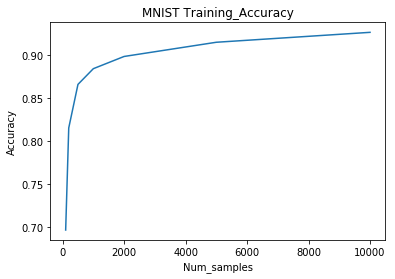

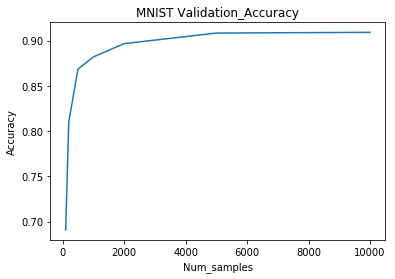

Sample Size: valid_score, train_score
100: 0.6908, 0.69646
200: 0.8101, 0.81514
500: 0.8686, 0.8658
1000: 0.882, 0.88408
2000: 0.8967, 0.89828
5000: 0.9084, 0.9148
10000: 0.9092, 0.92634


In [15]:
'''
PROBLEM 2: TRAIN CLASSIFIERS AND PLOT ACCURACY
'''

print('PROBLEM 2: SUPPORT VECTOR MACHINES')
# ----------TRAIN MNIST DATA------------#
# expect between 70-90% accuracy
print("Training MNIST")
clf_mnist = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
valid_scores, train_scores = train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')
print_scores(experiments, valid_scores, train_scores)
    

Training CIFAR


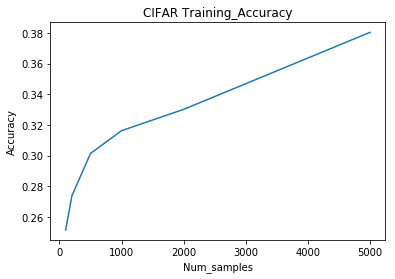

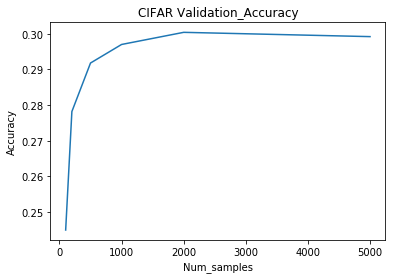

Sample Size: valid_score, train_score
100: 0.6908, 0.69646
200: 0.8101, 0.81514
500: 0.8686, 0.8658
1000: 0.882, 0.88408
2000: 0.8967, 0.89828
5000: 0.9084, 0.9148


In [16]:
# -----------TRAIN CIFAR DATA-----------#
# expect between 25-35% accuracy
print("Training CIFAR")
clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
valid_error, train_error = train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')
print_scores(experiments, valid_scores, train_scores)

Training SPAM


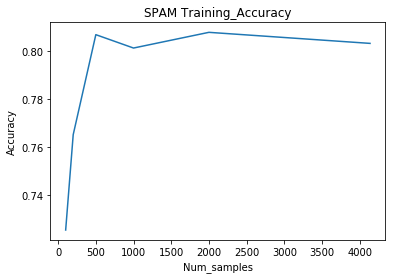

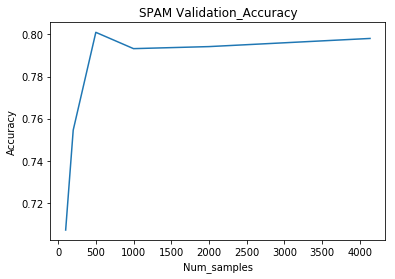

Sample Size: valid_score, train_score
100: 0.6908, 0.69646
200: 0.8101, 0.81514
500: 0.8686, 0.8658
1000: 0.882, 0.88408
2000: 0.8967, 0.89828
4137: 0.9084, 0.9148


In [17]:
# ----------TRAIN SPAM DATA -------------#
# expect between 70-90% accuracy
print("Training SPAM")
clf_spam = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 4137]
valid_error, train_error = train_svm(experiments, clf_spam, spam_train_set, spam_train_y.ravel(), spam_valid_set, spam_valid_y, 'SPAM')
print_scores(experiments, valid_scores, train_scores)

In [18]:
'''
PROBLEM 3: FIND BEST C VALUE MNIST SET
'''
print('PROBLEM 3: HYPERPARAMETER TUNING')
print('Input: MNIST Set, 10000 Sample Points')

'''
Function: find_best_C
Purpose: Returns best c_value on given data set
Param:
    c_values - range of C values to test
    train_set - training data
    train_y - training labels
    valid_set - validation data
    valid_y - validation labels
Returns: best C value 
'''
def find_best_C(c_values, experiments, train_set, train_y, valid_set, valid_y):
    scores = list()
    experiments = [10000]
    for c in c_values:
        print('C value: ' + str(c))
        clf_mnist = SVC(C=c, kernel="linear")
        valid_scores, train_scores = train_svm_no_plot(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y)
        scores.append(valid_scores[0])
        print('valid_score ' + str(valid_scores[0]))
#     print('scores are ' + str(scores))
    best_score = max(scores)
    index = scores.index(best_score)
    best_c = c_values[index]
    print('The results are in! Best C for MNIST set: ' + str(best_c) + " with valid score: " + str(best_score))



PROBLEM 3: HYPERPARAMETER TUNING
Input: MNIST Set, 10000 Sample Points


In [19]:
# ATTEMPT 1: SMALL C-VALUES
print('Testing small C-values')
C_range = [.01, .001, .0001, .00001, .000001, .0000001, .00000001, .000000001]
experiments = [10000]
find_best_C(C_range, experiments, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y)

Testing small C-values
C value: 0.01
valid_score 0.9092
C value: 0.001
valid_score 0.9092
C value: 0.0001
valid_score 0.9095
C value: 1e-05
valid_score 0.9159
C value: 1e-06
valid_score 0.9319
C value: 1e-07
valid_score 0.923
C value: 1e-08
valid_score 0.8934
C value: 1e-09
valid_score 0.6473
The results are in! Best C for MNIST set: 1e-06 with valid score: 0.9319


In [20]:
# ATTEMPT 2: SMALL C-VALUES CLOSE TO 10^-6
print('Testing C-values close to 10^-6')
C_range = [.000002, .000003, .000004, .000005, .000006]
experiments = [10000]
find_best_C(C_range, experiments, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y)

Testing C-values close to 10^-6
C value: 2e-06
valid_score 0.9277
C value: 3e-06
valid_score 0.923
C value: 4e-06
valid_score 0.921
C value: 5e-06
valid_score 0.9202
C value: 6e-06
valid_score 0.9182
The results are in! Best C for MNIST set: 2e-06 with valid score: 0.9277


In [21]:
# ATTEMPT 3: Larger C Values
print('Testing largeish C-values')
C_range = [1, 5, 10, 100]
experiments = [10000]
find_best_C(C_range, experiments, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y)

Testing largeish C-values
C value: 1
valid_score 0.9092
C value: 5
valid_score 0.9092
C value: 10
valid_score 0.9092
C value: 100
valid_score 0.9092
The results are in! Best C for MNIST set: 1 with valid score: 0.9092


In [22]:
'''
PROBLEM 4: K-FOLD
'''
print('PROBLEM 4: K-FOLD CROSS VALIDATION')

PROBLEM 4: K-FOLD CROSS VALIDATION


In [23]:
'''
Function: k_fold_score
Purpose: compute validation score using k-fold algorithm
Param:
    data_set - trainnig data to partition
    labels - labels corresponding to training data
    k - number of partitions
Return: mean of validation scores
    
'''

def k_fold_score(data_set, labels, clf, k):
    kf_total = cross_validation.KFold(data_set.shape[0], n_folds=5, shuffle=True, random_state=4)
    scores = cross_validation.cross_val_score(clf, data_set, labels, cv=kf_total, n_jobs = 1)
    return scores.mean()



In [24]:
'''
    Function find_best_C_kfold()
    Purpose: Print best C value and associated valid score using kfold algorithm
    Params
        c-values - list of C values to test
    Return - best c_value to use
'''

def find_best_C_kfold(c_values, train_data, labels, n_folds):
    scores = list() 
    print('c-value: score')
    for c in c_values:
        clf = SVC(C=c)
        score = k_fold_score(train_data, labels.T.ravel(), clf, n_folds)
        scores.append(score)
        print(str(c) + ': ' + str(score))
    best_score = max(scores)
    index = scores.index(best_score)
    best_c = c_values[index]
    print('Results are in! Best C-Value is ' + str(best_c) + ' with score ' + str(best_score))
    return best_c

    

In [25]:
print("Testing C-Values with Fold Algorithm")

# Testing values of C from 10^-6 to 100
c_values = [100, 10, 1, .1, .001, .0001, .00001, .000001]
n_folds = 5
find_best_C_kfold(c_values, spam_trainX, spam_labels.T.ravel(), n_folds)

Testing C-Values with Fold Algorithm
c-value: score
100: 0.828884964352
10: 0.828886085648
1: 0.821731842009
0.1: 0.766626860651
0.001: 0.709976172455
0.0001: 0.709976172455
1e-05: 0.709976172455
1e-06: 0.709976172455
Results are in! Best C-Value is 10 with score 0.828886085648


10

In [26]:
# Testing values of C from 200 to 10000
c_values = [200, 300, 400, 500, 600, 700, 800, 1000, 5000, 10000]
n_folds = 5
find_best_C_kfold(c_values, spam_trainX, spam_labels.T.ravel(), n_folds)


c-value: score
200: 0.825984731683
300: 0.824631327148
400: 0.825792055616
500: 0.824439398611
600: 0.822892570478
700: 0.822699520646
800: 0.823279978322
1000: 0.821926386903
5000: 0.81844513591
10000: 0.817286276269
Results are in! Best C-Value is 200 with score 0.825984731683


200

In [27]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************


In [28]:
# --------------- EXPERIMENT WITH MNIST CLF HYPER-PARAMETERS ------------------------#

In [29]:
'''
Function: generate_csv
Purpose: predict training_data, write results to csv file
Param: N/A
Return: N/A, instead generates .csv file for kaggle submission
'''
def generate_csv(test_data, train_data, train_labels, c_value, csv_file_name):
    clf = SVC(C=c_value, kernel='linear')
    clf.fit(train_data, train_labels)
    predicted_labels = clf.predict(test_data)
    with open(csv_file_name + '.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(predicted_labels)):
            writer.writerow([i, predicted_labels[i]])
    csvfile.close()
    print()
    
    
    

In [30]:
# Generate mnist csv submission
mnist_data = io.loadmat('../mnist/test.mat')['testX']
c_value = .000001
generate_csv(mnist_data, mnist_train_set, mnist_train_y, c_value, 'mnist_friday_kaggle.csv')

In [31]:
# Generate spam csv submission
spam_data = sp.io.loadmat('../spam/spam_data.mat')['test_data']
c_value = 10
generate_csv(spam_data, spam_train_set, spam_train_y.ravel(), c_value, 'spam_friday_kaggle.csv')